Bài 1: 
Chọn ảnh quả kiwi bất kì .
Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới.
Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin.
Lưu ảnh kết quả vào file kiwi_wave.jpg

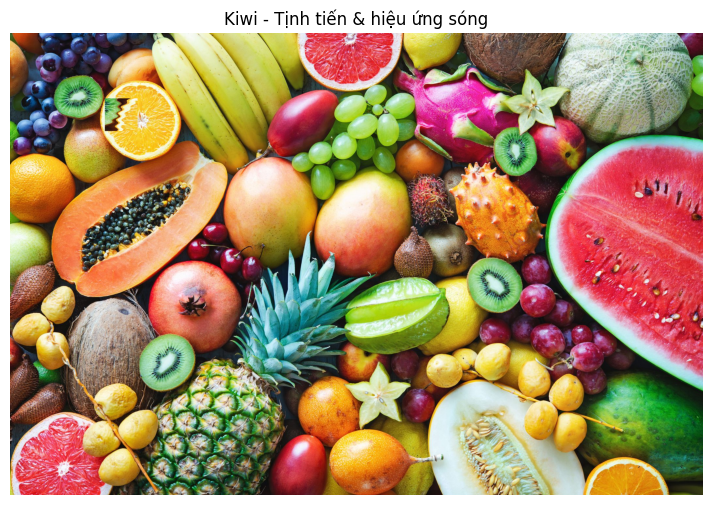

In [2]:
from PIL import Image
import numpy as np
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt
import os

input_folder = 'exercise'
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

img_path = os.path.join(input_folder, 'colorful-ripe-tropical-fruits.jpg')
img = Image.open(img_path).convert('RGB')
img_np = np.array(img)

x, y, w, h = 240, 170, 100, 100
kiwi_crop = img_np[y:y+h, x:x+w, :]

translated_img = img_np.copy()
new_x = x + 50
new_y = y + 30

def apply_wave_effect(img_crop, amplitude=5, wavelength=20):
    """
    Biến dạng ảnh bằng hiệu ứng sóng sin theo trục x.
    """
    h, w, c = img_crop.shape
    coords_y, coords_x = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')

    coords_x_deformed = coords_x + amplitude * np.sin(2 * np.pi * coords_y / wavelength)

    warped_img = np.zeros_like(img_crop)
    
    for i in range(3): 
        warped_img[:, :, i] = map_coordinates(img_crop[:, :, i], [coords_y, coords_x_deformed], order=1, mode='reflect')
    
    return warped_img

kiwi_wave = apply_wave_effect(kiwi_crop)

translated_img[new_y:new_y+h, new_x:new_x+w, :] = kiwi_wave

final_img = Image.fromarray(translated_img)
output_path = os.path.join(output_folder, 'kiwi_wave.jpg')
final_img.save(output_path)

plt.figure(figsize=(10, 6))
plt.imshow(final_img)
plt.title("Kiwi - Tịnh tiến & hiệu ứng sóng")
plt.axis('off')
plt.show()


Bài 2: 
Chọn quả đu đủ và dưa hấu từ google.
Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím.
Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

In [3]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

input_folder = 'exercise'
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

papaya = Image.open(os.path.join(input_folder, 'papaya.png')).convert('RGBA')
watermelon = Image.open(os.path.join(input_folder, 'watermelon.png')).convert('RGBA')

def apply_gradient_color(image_rgba, color_start, color_end):
    """
    Đổi màu ảnh RGBA theo gradient từ color_start → color_end (theo chiều dọc).
    color_start và color_end là tuple RGB.
    """
    img_np = np.array(image_rgba)
    alpha_channel = img_np[:, :, 3]
    h, w = img_np.shape[:2]

    gradient = np.linspace(0, 1, h).reshape(-1, 1)

    # Tính màu theo gradient
    gradient_rgb = (1 - gradient) * np.array(color_start) + gradient * np.array(color_end)
    gradient_rgb = np.uint8(np.tile(gradient_rgb, (1, w, 1)))

    result = np.dstack((gradient_rgb, alpha_channel))

    return Image.fromarray(result, mode='RGBA')

papaya_colored = apply_gradient_color(papaya, (255, 0, 0), (0, 255, 0))
watermelon_colored = apply_gradient_color(watermelon, (255, 255, 0), (128, 0, 128))

canvas_width = papaya_colored.width + watermelon_colored.width + 30
canvas_height = max(papaya_colored.height, watermelon_colored.height) + 20
canvas = Image.new('RGBA', (canvas_width, canvas_height), (0, 0, 0, 0))

canvas.paste(papaya_colored, (10, 10), papaya_colored)

output_path = os.path.join(output_folder, 'fruits_gradient_composite.png')
canvas.save(output_path)

plt.figure(figsize=(10, 6))
plt.imshow(canvas)
plt.title("Papaya & Watermelon with Gradient Colors")
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'exercise\\papaya.png'

Bài 3: 
Chọn ảnh núi và thuyền .
Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False).
Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.
Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

Bài 4: 
Chọn ngôi chùa bất kì.
Phóng to ngôi chùa lên 5 lần.
Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa.
Lưu ảnh kết quả vào pagoda_warped.jpg.

Bài 5:
Tạo một chương trình menu tương tác cho phép người dùng chọn các phép biến đổi sau:
Tịnh tiến (hỏi số pixel di chuyển theo x và y).
Xoay (hỏi góc xoay và chọn reshape=True/False).
Phóng to/thu nhỏ (hỏi hệ số zoom).
Làm mờ Gaussian (hỏi giá trị sigma).
Biến đổi sóng (hỏi biên độ sóng).
Người dùng chọn ảnh từ 3 ảnh bất kì